<a href="https://colab.research.google.com/github/douglascdsantos/data_science/blob/main/04%20Gr%C3%A1fico%20de%20Barras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Gráfico de Barras

O gráfico de barras é um gráfico composto por barras de formato retangular. O comprimento (ou altura) de cada barra é proporcional ao valor que ela representa. Vale ressaltar que é comum vermos tanto barras desenhadas na vertical quanto na horizontal.

<center><img src="https://www.kdnuggets.com/wp-content/uploads/how-to-make-a-bar-chart-in-d3-fig12.png" height="200px"></center>

Nenhuma verdade é absoluta, mas o gráfico de barras é bem mais útil quanto tentamos representar dados discretos. Apesar de muita gente confundir ele com o histograma, são conceitos completamente diferentes.

## Dicas

* Facilidade para identificar a maior barra.
* Devem ter uma linha de base zero.
* Menor curva de aprendizado.
* Menor processamento pelo cérebro.
* Existem diversas variações.

## Problemas
Excesso de legendas x barras.


## Plotar o gráfico de barras

Os dados que usaremos neste *notebook* são os dados públicos do Metrô de São Paulo.

Os *datasets* contendo diversas estatísticas podem ser encontrados no [Portal da Governança Corporativa e Transparência](https://transparencia.metrosp.com.br/). Nesse Portal, você encontra deliberações do Comitê de Auditoria, composição dos conselhos, e informações de todas as áreas do Metrô, podendo acompanhar a gestão financeira, os novos projetos em gestação e o andamento das obras e sua evolução. 

Apesar de terem sido disponibilizados em formato `csv`, o *dataset* "Entrada de Passageiros por Estação - Média Dias Úteis - Dezembro/2018" precisou ser trabalhado e estruturado. 

Disponibilizei o arquivo já estruturado [neste link](https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/entrada_passageiro_linha1.csv).

In [45]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt

# importar dados para dataframe
data = "https://raw.githubusercontent.com/carlosfab/dsnp2/master/datasets/entrada_passageiro_linha1.csv"
df = pd.read_csv(data)

# ver as 5 primeiras entradas
df.head()

,Estação,Entradas
0,Jabaquara,90.0
1,Conceição,40.0
2,São Judas,20.0
3,Saúde,36.0
4,Praça da Árvore,22.0


In [46]:
# ver as 5 ultimas entradas
df.tail()

,Estação,Entradas
19,Santana,64.000
20,Jardim São Paulo-Ayrton Senna,14.000
21,Parada Inglesa,16.000
22,Tucuruvi,70.000
23,TOTAL,1.425


In [47]:
# apagar linha TOTAL
df.drop(index=23, axis=0, inplace=True)

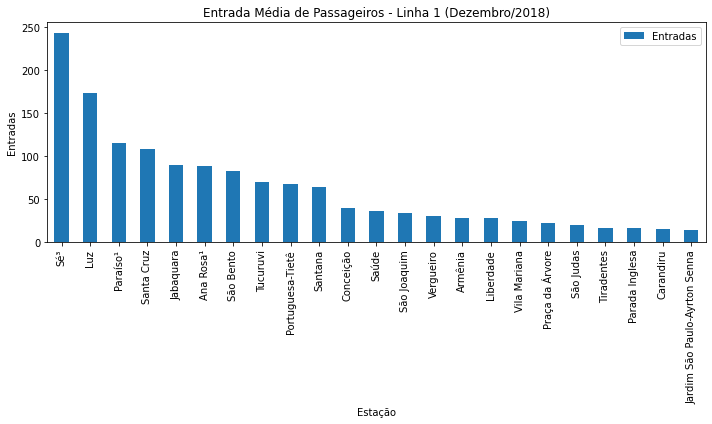

In [48]:
# plotar o gráfico de barras com a entrada média de passageiros
fig, ax = plt.subplots(figsize=(10,6))

df.sort_values(by = 'Entradas', ascending = False).plot(x="Estação", y="Entradas", kind="bar", ax=ax)

ax.set_title("Entrada Média de Passageiros - Linha 1 (Dezembro/2018)")
ax.set_xlabel("Estação")
ax.set_ylabel("Entradas")

plt.tight_layout()

Em mais um exemplo de gráficos de barra, vou importar o *dataset* da pesquisa feita pelo Data Hackers, sobre a situação atual do Data Science no Brasil.

A pesquisa Data Hackers Survey 2019 foi realizada pela comunidade Data Hackers durante o mês de novembro de 2019. Conduzida de forma online, foram feitas 36 perguntas, e o resultado (anonimizado) foi disponibilizado dentro da plataforma Kaggle. 

In [49]:
# importar o dataset
DATA_PATH_2 = "https://www.dropbox.com/s/ttho30qxqe47j43/datahackers-survey-2019-anonymous-responses.csv?dl=1"
df2 = pd.read_csv(DATA_PATH_2)

# extrair o nome da variável da tupla
df2.columns = [eval(col)[1] for col in df2.columns]

# ver as 5 primeiras entradas
df2.head()

,id,age,gender,living_in_brasil,living_state,born_or_graduated,degreee_level,job_situation,workers_number,manager,salary_range,time_experience_data_science,time_experience_before,is_data_science_professional,linear_regression,logistic_regression,glms,decision_tree,random_forest,neural_networks,bayesian_inference,ensemble,svms,cnns,rnns,hmms,gans,markov_chains,nlp,gradient_boosted_machines,cluster_analysis,survival_analysis,longitudinal_data_analysis,joint analysis,no_listed_methods,sql_,r,python,c_c++_c#,dotnet,...,microsoft_azure,do_not_know,other,data_hackers_blog,data_hackers_podcast,weekly_newsletter,slack_channel,data_hackers_bootcamp,do_not_know_data_hackers,prefered_data_hackers_initiative,telegram_groups,whatsapp_groups,youtube_channels,other_brasilian_blogs,other_slack_channels,twitter,abroad_blogs,abroad_podcasts,meetups_and_events,only_data_hackers,other,udacity,coursera,udemy,height,edx,data_camp,data_quest,kaggle_learn,online_courses,other,data_science_plataforms_preference,other,draw_participation,living_macroregion,origin_macroregion,anonymized_degree_area,anonymized_market_sector,anonymized_manager_level,anonymized_role
0,v9otv8j9wdvjrv9otvwnn9owhzq54ktv,37.0,Masculino,1,Minas Gerais (MG),1.0,Estudante de Graduação,Empregado (CTL),de 1 a 5,0.0,de R$ 1.001/mês a R$ 2.000/mês,Não tenho experiência na área de dados,Não tive experiência na área de TI/Engenharia ...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,Nunca fiz cursos online,NaN,1.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Outras,NaN,Outras
1,875ul998t0hqcv0871uptwf3oswcfv35,24.0,Feminino,1,São Paulo (SP),1.0,Estudante de Graduação,Empregado (CTL),Acima de 3000,0.0,de R$ 2.001/mês a R$ 3000/mês,Menos de 1 ano,Não tive experiência na área de TI/Engenharia ...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,NaN,Data Science Academy,0.0,Região Sudeste,NaN,Computação / Engenharia de Software / Sistemas...,Educação,NaN,Data Analyst/Analista de Dados
2,puscuk079vw1pusbb900pzw2xvpxtgdk,26.0,Masculino,1,São Paulo (SP),1.0,Graduação/Bacharelado,Empregado (CTL),Acima de 3000,0.0,de R$ 4.001/mês a R$ 6.000/mês,de 1 a 2 anos,de 6 a 10 anos,1,0,0,0,0,1,1,0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,1,1,0,0,0,Newsletter Semanal,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,Udemy,NaN,1.0,Região Sudeste,NaN,Outras Engenharias,Indústria (Manufatura),NaN,Outras
3,rmel8ewqpbffp2mnfbzermel8eqincov,21.0,Masculino,1,São Paulo (SP),0.0,Estudante de Graduação,Estagiário,de 11 a 50,0.0,de R$ 1.001/mês a R$ 2.000/mês,Menos de 1 ano,de 2 a 3 anos,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,1,Ainda não conhecia o Data Hackers,0,1,0,0,0,0,0,1,0,0,0,0,1,1,1,0,0,0,0,0,0,Alura,NaN,1.0,Região Sudeste,Região Sudeste,Computação / Engenharia de Software / Sistemas...,Tecnologia/Fábrica de Software,NaN,Business Intelligence/Analista de BI
4,pj9mgud4d6mdct1l7vq0pj9mgu78h6ju,27.0,Masculino,1,NaN,1.0,Graduação/Bacharelado,Freelancer,de 6 a 10,1.0,de R$ 6.001/mês a R$ 8.000/mês,de 4 a 5 anos,de 4 a 5 anos,1,1,0,0,1,1,0,0,1,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,1,0,...,0,0,0,1,0,0,0,0,0,Blog/Medium do Data Hackers,0,0,0,0,0,0,0,0,0,0,1,1,1,1,0,0,0,0,0,0,0,Udemy,NaN,1.0,NaN,NaN,Computação / Engenharia de Software / Sistemas...,Internet/Ecommerce,"C-level (CDO, CIO, CTO)",NaN


In [50]:
print(type(eval("('P5', 'living_state')")))
print(eval("('P5', 'living_state')")[1])

<class 'tuple'>
living_state


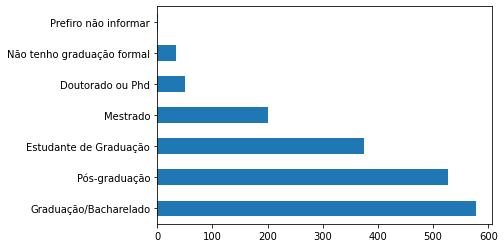

In [51]:
# plotar escolaridade
df2.degreee_level.value_counts().plot(kind='barh')

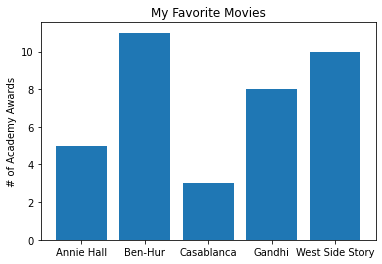

In [52]:
movies = ["Annie Hall", "Ben-Hur", "Casablanca", "Gandhi", "West Side Story"]
num_oscars = [5, 11, 3, 8, 10]
# plot bars with left x-coordinates [0, 1, 2, 3, 4], heights [num_oscars]
plt.bar(range(len(movies)), num_oscars)
plt.title("My Favorite Movies") # add a title
plt.ylabel("# of Academy Awards") # label the y-axis
# label x-axis with movie names at bar centers
plt.xticks(range(len(movies)), movies)
plt.show()

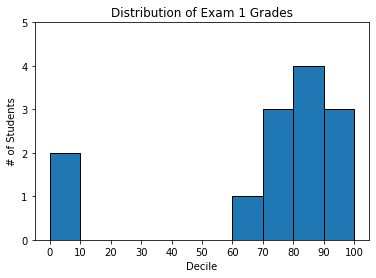

In [53]:
from collections import Counter
grades = [83, 95, 91, 87, 70, 0, 85, 82, 100, 67, 73, 77, 0]
# Bucket grades by decile, but put 100 in with the 90s
histogram = Counter(min(grade // 10 * 10, 90) for grade in grades)
plt.bar([x + 5 for x in histogram.keys()],  # Shift bars right by 5
        histogram.values(),                 # Give each bar its correct height
        10,                                 # Give each bar a width of 10
        edgecolor=(0, 0, 0))                # Black edges for each bar
plt.axis([-5, 105, 0, 5]) # x-axis from -5 to 105,
                          # y-axis from 0 to 5
plt.xticks([10 * i for i in range(11)]) # x-axis labels at 0, 10, ..., 100
plt.xlabel("Decile")
plt.ylabel("# of Students")
plt.title("Distribution of Exam 1 Grades")
plt.show()

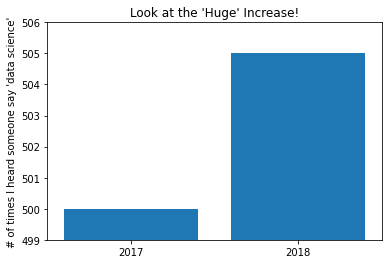

In [54]:
mentions = [500, 505]
years = [2017, 2018]
plt.bar(years, mentions, 0.8)
plt.xticks(years)
plt.ylabel("# of times I heard someone say 'data science'")
# if you don't do this, matplotlib will label the x-axis 0, 1
# and then add a +2.013e3 off in the corner (bad matplotlib!)
plt.ticklabel_format(useOffset=False)
# misleading y-axis only shows the part above 500
plt.axis([2016.5, 2018.5, 499, 506])
plt.title("Look at the 'Huge' Increase!")
plt.show()